In [25]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
# fix random seed for reproducibility
numpy.random.seed(7)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

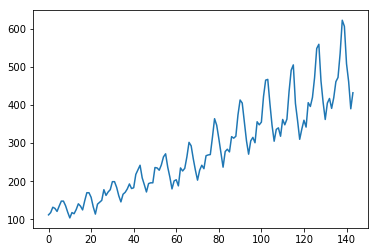

In [28]:
plt.plot(dataset)
plt.show()

In [29]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# print(train)

96 48


In [31]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [32]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(8, return_sequences=True))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
1s - loss: 0.0402 - acc: 0.0106
Epoch 2/500
0s - loss: 0.0194 - acc: 0.0106
Epoch 3/500
0s - loss: 0.0177 - acc: 0.0106
Epoch 4/500
0s - loss: 0.0171 - acc: 0.0106
Epoch 5/500
0s - loss: 0.0164 - acc: 0.0106
Epoch 6/500
0s - loss: 0.0149 - acc: 0.0106
Epoch 7/500
0s - loss: 0.0128 - acc: 0.0106
Epoch 8/500
0s - loss: 0.0104 - acc: 0.0106
Epoch 9/500
0s - loss: 0.0076 - acc: 0.0106
Epoch 10/500
0s - loss: 0.0052 - acc: 0.0106
Epoch 11/500
0s - loss: 0.0038 - acc: 0.0106
Epoch 12/500
0s - loss: 0.0030 - acc: 0.0106
Epoch 13/500
0s - loss: 0.0027 - acc: 0.0106
Epoch 14/500
0s - loss: 0.0027 - acc: 0.0106
Epoch 15/500
0s - loss: 0.0026 - acc: 0.0106
Epoch 16/500
0s - loss: 0.0025 - acc: 0.0106
Epoch 17/500
0s - loss: 0.0026 - acc: 0.0106
Epoch 18/500
0s - loss: 0.0025 - acc: 0.0106
Epoch 19/500
0s - loss: 0.0025 - acc: 0.0106
Epoch 20/500
0s - loss: 0.0025 - acc: 0.0106
Epoch 21/500
0s - loss: 0.0024 - acc: 0.0106
Epoch 22/500
0s - loss: 0.0024 - acc: 0.0106
Epoch 23/500
0s - l

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [36]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.02 RMSE
Test Score: 66.17 RMSE


In [37]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [38]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

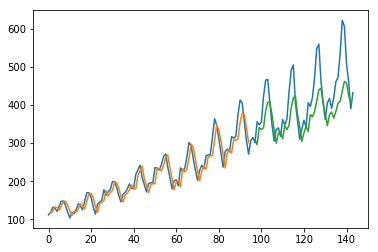

In [39]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()